In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Prune data
data = pd.read_csv("NYPD_arrests.csv", parse_dates=["ARREST_DATE"])
data = data[["ARREST_DATE", "OFNS_DESC"]]
data = data.dropna(subset=['OFNS_DESC'])
data["YEAR"] = pd.DatetimeIndex(data['ARREST_DATE']).year
data["MONTH"] = pd.DatetimeIndex(data['ARREST_DATE']).month


# Filter data by offense
def get_offence_data(data, offence):
    return data.loc[data['OFNS_DESC'] == offence]

In [104]:
def show_trend_plot(data, legends):
    fig, ax = plt.subplots()
    for category in data:    
        ax.plot(category.groupby(pd.Grouper(key='ARREST_DATE', freq='M')).size())

    ax.legend(legends)
    ax.set(xlabel='Date', ylabel='Number of arrests',
       title='Arrests per month since 2006 (Trend)')
    ax.grid()

    fig.savefig("trend.png")
    plt.show()

In [105]:
data_drugs = get_offence_data(data, 'DANGEROUS DRUGS')
data_robbery = get_offence_data(data, 'ROBBERY')
data_assault = get_offence_data(data, 'ASSAULT 3 & RELATED OFFENSES')

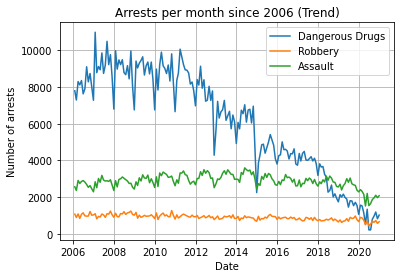

In [107]:
show_trend_plot([data_drugs, data_robbery, data_assault], ["Dangerous Drugs", "Robbery", "Assault"])

In [167]:
def get_normalized_arrests(crime_type):
    normalized_arrests = [0 for i in range(12)]
    total_arrests_per_year = crime_type.groupby(["YEAR"]).size()
    arrests_per_month = crime_type.groupby(["YEAR", "MONTH"]).size()

    # For each year in dataset
    for year in range(2006, 2021):
        for index, arrests in enumerate(arrests_per_month[year]):
            normalized_arrests[index] += arrests / total_arrests_per_year[year]

    print(normalized_arrests)

normalized_drugs = get_normalized_arrests(data_drugs)
normalized_assault = get_normalized_arrests(data_assault)
normalized_robbery = get_normalized_arrests(data_robbery)

fig = plt.figure()
ax = fig.add_subplot()
for crime_type in [data_drugs, data_assault, data_robbery]:
    ax.plot(normalized_drugs)

ax.legend(["Dangerous drugs"])
ax.set(xlabel='Month', ylabel='Number of arrests', title='Total arrests for each month')
ax.grid()

fig.savefig("Yearly.png")
plt.show()


[1.3980125042413138, 1.3179057950439388, 1.4005049958623992, 1.302546660305262, 1.370610998021559, 1.1500874330971498, 1.1895127055756018, 1.310609692389012, 1.204948703906252, 1.3144424681241895, 1.0897158041003374, 0.9511022393329833]
[1.2463794070271772, 1.1546911315494885, 1.306575822723777, 1.2527835867020267, 1.3824469149400564, 1.2939629171201135, 1.3227761246082166, 1.2946219853225562, 1.227015574632238, 1.2611212413567292, 1.152985338356887, 1.1046399556607347]
[1.369450695607283, 1.1276485440893673, 1.2092549102731498, 1.1829931550965163, 1.33559501343064, 1.2426027028124738, 1.2548064744756482, 1.321634520241179, 1.2378243148353933, 1.3956804530594311, 1.1935988337680221, 1.1289103823108964]


'\n\nfig = plt.figure()\nax = fig.add_subplot()\n# for crime_type in [data_drugs, data_assault, data_robbery]:\nax.plot(normalized_drugs)\n\nax.legend(["Dangerous drugs"])\nax.set(xlabel=\'Month\', ylabel=\'Number of arrests\', title=\'Total arrests for each month\')\nax.grid()\n\nfig.savefig("Yearly.png")\nplt.show()\n'